In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import pandas as pd 


2025-03-08 16:56:21.349573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741434981.544366  296616 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741434981.601024  296616 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 16:56:22.087534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , test_labels) =  fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
train_images.shape
type(train_images)
class_name = ['T-shirt/top', 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot'   ]

numpy.ndarray

In [6]:
train_images = train_images / 255 
test_images  = test_images / 255 

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
])

/home/kifal/gcpml/training-data-analyst/tf_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1741447889.497805  296616 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:02:00.0, compute capability: 8.9


In [10]:
model.compile(optimizer='adam' , 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [12]:
model.fit(train_images,train_labels,epochs = 50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8630 - loss: 0.3821
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8765 - loss: 0.3428
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8863 - loss: 0.3114
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8921 - loss: 0.2916
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8945 - loss: 0.2815
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9028 - loss: 0.2626
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9047 - loss: 0.2573
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9079 - loss: 0.2476
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9136 - loss: 0.2378
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9151 - loss: 0.2296
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9174 - loss: 0.2234
Epoch 12/50
1875/18

In [14]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose =1 )
print("Here is the accuracy ",test_acc)
print("Here is the loss ",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8858 - loss: 0.5090
Here is the accuracy  0.8848999738693237
Here is the loss  0.5057482719421387


In [24]:
predictions = model.predict(test_images)
print("Here are the predictions ", predictions[0])
print("====================================================================================")
print("Here are the predictions ", np.argmax(predictions[535]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Here are the predictions  [1.0034094e-23 4.8141010e-23 1.1093038e-18 1.6313439e-22 2.3629370e-17
 2.2548835e-07 1.8648175e-21 2.5457061e-06 4.7969861e-20 9.9999726e-01]
Here are the predictions  5


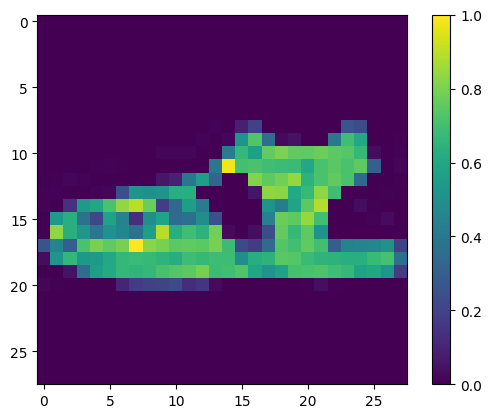

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(test_images[535])
plt.colorbar()
plt.show()